In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data = pd.read_csv("ex1data2.csv", names = ["Size","Rooms","Price"])

In [7]:
data.head()

,Size,Rooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [8]:
X = data.iloc[:,[0,1]]
y = data.iloc[:,2]

In [9]:
def Normalise(X):
    norm = pd.DataFrame(np.zeros((len(X),len(X.columns))))
    for i in range(len(X.columns)):
        norm[norm.columns[i]] = (X[X.columns[i]] - np.mean(X[X.columns[i]]))/(np.std(X[X.columns[i]]))
    return norm

In [10]:
X_data = Normalise(X)

In [11]:
X1 = np.append(np.matrix(np.ones(len(data))).transpose(),np.matrix(X_data),axis=1)
y1 = np.matrix(y).transpose()
theta = np.zeros((np.shape(X1)[1],1))

#setting up the simulation conditions

iterations = 2000
alpha = 0.01

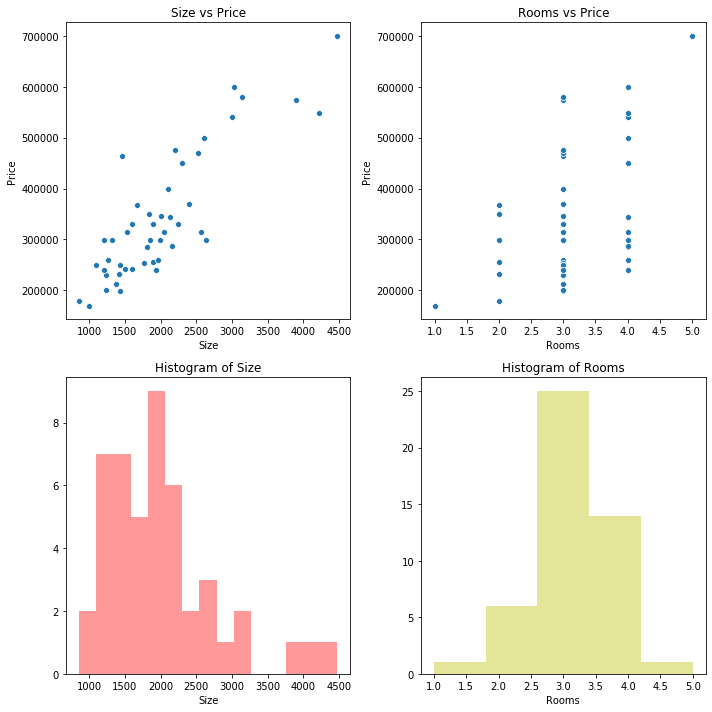

In [12]:
plt.figure(figsize = (10,10))

plt.subplot(2,2,1)
sns.scatterplot(X.iloc[:,0],y)
plt.title("Size vs Price")
plt.tight_layout()

plt.subplot(2,2,2)
sns.scatterplot(X.iloc[:,1],y)
plt.tight_layout()
plt.title("Rooms vs Price")

plt.subplot(2,2,3)
sns.distplot(X.iloc[:,0], kde = False, bins = 15, color = 'r')
plt.title("Histogram of Size")
plt.tight_layout()

plt.subplot(2,2,4)
sns.distplot(X.iloc[:,1], kde = False, bins = 5, color = 'y')
plt.title("Histogram of Rooms")
plt.tight_layout()

In [13]:
#function to compute cost function
def computecostmulti(X,y,theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/(2*m))*np.sum(np.square(predictions-y))
    return cost

In [14]:
#function to compute gradient descent

def gradientdescent(X,y,theta,alpha,iterations):
    m = len(y)
    cost_history = np.zeros((iterations,1))
    theta_history = np.zeros((iterations,np.shape(X)[1]))
    for i in range(iterations):
        theta = theta - ((alpha/m) * ((np.dot(X.transpose(),((X.dot(theta))-y)))))
        theta_history[i,:] = theta.transpose()
        cost_history[i] = computecostmulti(X,y,theta)
    return theta,theta_history,cost_history

In [15]:
[theta_ans,theta_hist,cost_hist] = gradientdescent(X1,y1,theta,alpha,iterations)

Text(0, 0.5, 'Cost J($\\theta$)')

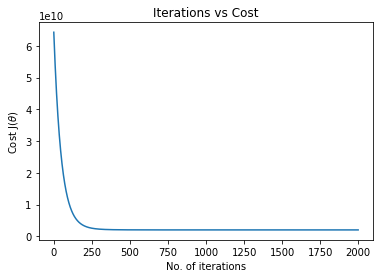

In [16]:
plt.figure()

plt.plot(range(iterations), cost_hist)
plt.title("Iterations vs Cost")
plt.xlabel("No. of iterations")
plt.ylabel(r"Cost J($\theta$)")

Text(0, 0.5, 'Cost')

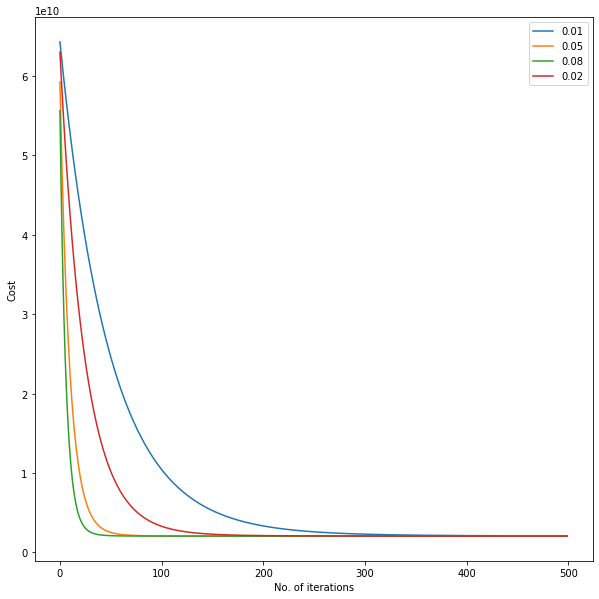

In [17]:
alphas = [0.01,0.05,0.08,0.02]
iterations = 2000
plt.figure(figsize = (10,10))
alpha_g = np.zeros((iterations,np.shape(X1)[1]))
for i in alphas:
    [theta_ans,theta_hist,cost_hist] = gradientdescent(X1,y1,theta,i,iterations)
    plt.plot(range(500), cost_hist[:500], label = i)
plt.legend()
plt.xlabel("No. of iterations")
plt.ylabel("Cost")